In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import linregress as LR
import pandas as pd
from pandas.util.testing import assert_frame_equal
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns",200)

In [2]:
#make a chronic patient table for this subset of conditions

# read in that pre-made table
df=pd.read_csv("../data_files/chronic_patients.csv")

In [3]:
opiates = df[df.received == 1]
pain_opiates = opiates[opiates.other_joint == 1]
chronic_opiates = opiates[opiates.chronic == 1]

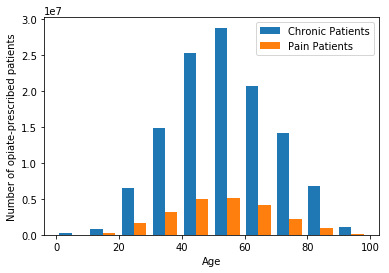

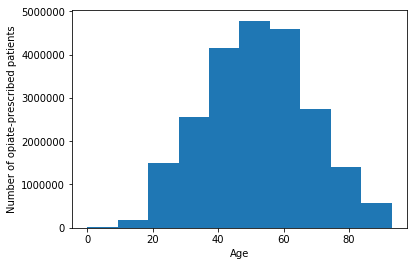

In [4]:
###############
opiates_all = df[df.received == 1]
chronic_opiates_all = opiates_all[opiates_all.chronic == 1]

#must multiply visits by patient weight (patwt)
chronic_wts_all = np.array(chronic_opiates_all.PATWT)
chronic_ages_all = np.array(chronic_opiates_all.AGE)

#############
#make histograms showing ages of chronic patients receiving opiates vs all patients receiving opiates

chronic_opiates_pain = chronic_opiates_all[chronic_opiates_all.other_joint == 1]

#must multiply visits by patient weight (patwt)
chronic_wts_pain = np.array(chronic_opiates_pain.PATWT)
chronic_ages_pain = np.array(chronic_opiates_pain.AGE)

plt.hist((chronic_ages_all,chronic_ages_pain), weights=(chronic_wts_all,chronic_wts_pain), bins=10, label=("Chronic Patients","Pain Patients"))
plt.legend()

plt.ylabel("Number of opiate-prescribed patients")
plt.xlabel("Age")
plt.show()

plt.hist(chronic_ages_pain, weights=chronic_wts_pain, bins=10)
plt.ylabel("Number of opiate-prescribed patients")
plt.xlabel("Age")
plt.show()

In [5]:
print(opiates.shape, chronic_opiates.shape)

(19064, 29) (4195, 29)


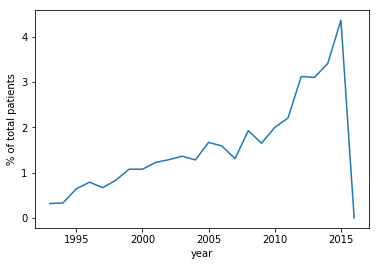

In [6]:
year_data_tot= []
year_data_chron= []
chron = df[df.other_joint == 1]
for year in range(1993, 2017):
    col = 'RACE'
    tmp_total = df.loc[(df['YEAR'] == year)]
    tmp_total = tmp_total[tmp_total[col].notnull()]
    tot_wts = np.sum(tmp_total.PATWT)
    
    tmp_chron = chron.loc[(chron['YEAR'] == year)]
    tmp_chron = tmp_chron[tmp_chron[col].notnull()]
    op_wts = np.sum(tmp_chron.PATWT)
    
    year_data_tot.append(op_wts/tot_wts*100)

years = np.arange(1993, 2017)
plt.plot(years, year_data_tot, label="total")
plt.xlabel("year")
plt.ylabel("% of total patients")
plt.show()
#% of TOTAL (not just opiates) patients diagnosed with some pain condition (pain/all)

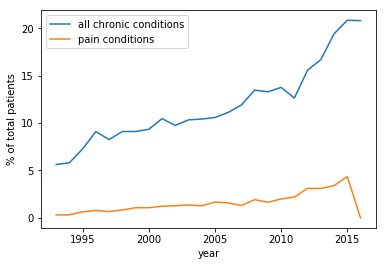

In [7]:
#make line chart comparing (all chronic patients vs all patients over time) vs (pain chronic patients vs all patients over time)

#plot all chronic patients
year_data_tot= []
year_data_chron= []
chron = df[df.chronic == 1]
for year in range(1993, 2017):
    col = 'RACE'
    tmp_total = df.loc[(df['YEAR'] == year)]
    tmp_total = tmp_total[tmp_total[col].notnull()]
    tot_wts = np.sum(tmp_total.PATWT)
    
    tmp_chron = chron.loc[(chron['YEAR'] == year)]
    tmp_chron = tmp_chron[tmp_chron[col].notnull()]
    op_wts = np.sum(tmp_chron.PATWT)
    
    year_data_tot.append(op_wts/tot_wts*100)

years = np.arange(1993, 2017)
plt.plot(years, year_data_tot, label="all chronic conditions")
plt.xlabel("year")
plt.ylabel("% of total patients")

#now plot pain patients
year_data_tot= []
year_data_chron= []
chron = df[df.other_joint == 1]
lens=[]
for year in range(1993, 2017):
    col = 'RACE'
    tmp_total = df.loc[(df['YEAR'] == year)]
    tmp_total = tmp_total[tmp_total[col].notnull()]
    tot_wts = np.sum(tmp_total.PATWT)
    
    tmp_chron = chron.loc[(chron['YEAR'] == year)]
    tmp_chron = tmp_chron[tmp_chron[col].notnull()]
    op_wts = np.sum(tmp_chron.PATWT)
    
    lens.append(len(tmp_chron.PATWT))
    
    year_data_tot.append(op_wts/tot_wts*100)

years = np.arange(1993, 2017)

plt.plot(years, year_data_tot, label="pain conditions")
plt.legend()
plt.show()
#% of TOTAL (not just opiates) patients diagnosed with some pain condition (pain/all), compared to
#% of TOTAL (not just opiates) patients diagnosed with some chronic condition (chronic/all)

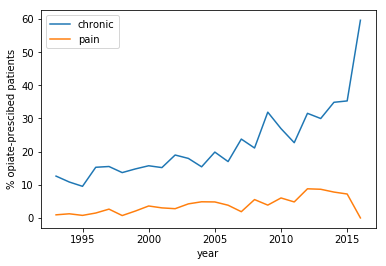

In [8]:
year_data_tot= []
year_data_chron= []
year_data_pain= []
lens = []
for year in range(1993, 2017):
    col = 'RACE'
    
    tmp_opiates = opiates.loc[(opiates['YEAR'] == year)]
    tmp_opiates = tmp_opiates[tmp_opiates[col].notnull()]
    op_wts = np.sum(tmp_opiates.PATWT)
    
    tmp_chron_opiates = chronic_opiates.loc[(chronic_opiates['YEAR'] == year)]
    tmp_chron_opiates = tmp_chron_opiates[tmp_chron_opiates[col].notnull()]
    ch_op_wts = np.sum(tmp_chron_opiates.PATWT)
    
    tmp_pain_opiates = pain_opiates.loc[(pain_opiates['YEAR'] == year)]
    tmp_pain_opiates = tmp_pain_opiates[tmp_pain_opiates[col].notnull()]
    pa_op_wts = np.sum(tmp_pain_opiates.PATWT)
    
    year_data_chron.append(ch_op_wts/op_wts*100)
    year_data_pain.append(pa_op_wts/op_wts*100)

years = np.arange(1993, 2017)
plt.plot(years, year_data_chron, label="chronic")
plt.plot(years, year_data_pain, label="pain")

plt.xlabel("year")
plt.ylabel("% opiate-prescibed patients")
plt.legend()
plt.show()
#% of OPIATE patients diagnosed with some pain condition (pain opiates/opiates), compared to
#% of OPIATE patients diagnosed with some chronic condition (chronic opiates/opiates)

0.24447412266531668


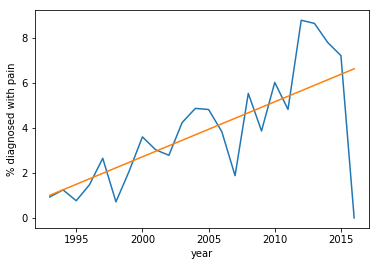

In [9]:
year_data_tot= []
year_data_chron= []
tmp = df[df.received == 1]
chron = tmp[tmp.other_joint == 1]
for year in range(1993, 2017):
    col = 'RACE'
    tmp_total = tmp.loc[(tmp['YEAR'] == year)]
    tmp_total = tmp_total[tmp_total[col].notnull()]
    tot_wts = np.sum(tmp_total.PATWT)
    
    tmp_chron = chron.loc[(chron['YEAR'] == year)]
    tmp_chron = tmp_chron[tmp_chron[col].notnull()]
    op_wts = np.sum(tmp_chron.PATWT)
    
    year_data_tot.append(op_wts/tot_wts*100)

years = np.arange(1993, 2017)
plt.plot(years, year_data_tot, label="total")

m, b = np.polyfit(years, year_data_tot, 1)
plt.plot(years, m*years + b, label="all years")
print(m)
plt.xlabel("year")
plt.ylabel("% diagnosed with pain")
plt.show()
#This plot is showing what percentage of OPIATE-PRESCRIBED patients were diagnosed with pain conditions, with regression
#pain opiates/opiates

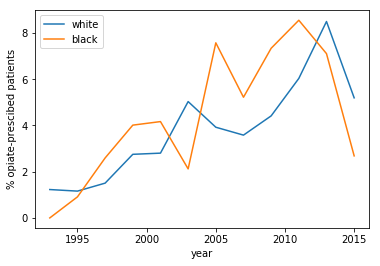

In [10]:
'''
1 = White          
2 = Black
these are the only races consistant across years
'''
year_data_white= []
year_data_black= []
year_data_other= []
for year in range(1993, 2017, 2):
    
    col = 'RACE'
    tmp_total = opiates.loc[(opiates['YEAR'] == year) | (opiates['YEAR'] == year+1)]
    tmp_total = tmp_total[tmp_total[col].notnull()]
    tot_wts = np.sum(tmp_total.PATWT)
    tot_white = tmp_total[tmp_total[col] == 1]
    white_wts = np.sum(tot_white.PATWT)
    tot_black = tmp_total[tmp_total[col] == 2]
    black_wts = np.sum(tot_black.PATWT)
    
    tmp_opiates = pain_opiates.loc[(pain_opiates['YEAR'] == year) | (pain_opiates['YEAR'] == year+1)]
    tmp_opiates = tmp_opiates[tmp_opiates[col].notnull()]
    op_white = tmp_opiates[tmp_opiates[col] == 1]
    op_white_wts = np.sum(op_white.PATWT)
    op_black = tmp_opiates[tmp_opiates[col] == 2]
    op_black_wts = np.sum(op_black.PATWT)
    
    year_data_white.append(op_white_wts/white_wts*100)
    year_data_black.append(op_black_wts/black_wts*100)

years = np.arange(1993, 2017,2)
plt.plot(years, year_data_white, label="white")
plt.plot(years, year_data_black, label="black")

plt.xlabel("year")
plt.ylabel("% opiate-prescibed patients")
plt.legend()
plt.show()
#This plot is showing what percentage of OPIATE-PRESCRIBED patients were diagnosed with pain conditions, with regression
#pain opiates/opiates, by race

0.24447412266531668


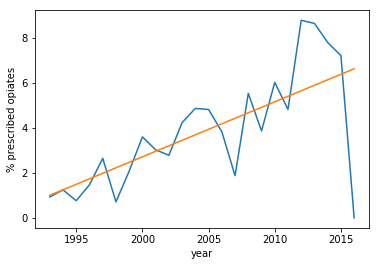

In [11]:
chronic_opiates = opiates[opiates.other_joint == 1]
chron = df[df.other_joint == 1]

year_data_tot= []
year_data_chron= []
lens = []
for year in range(1993, 2017):
    col = 'RACE'
    
    tmp_opiates = opiates.loc[(opiates['YEAR'] == year)]
    tmp_opiates = tmp_opiates[tmp_opiates[col].notnull()]
    op_wts = np.sum(tmp_opiates.PATWT)
    
    tmp_chron_opiates = pain_opiates.loc[(pain_opiates['YEAR'] == year)]
    tmp_chron_opiates = tmp_chron_opiates[tmp_chron_opiates[col].notnull()]
    ch_op_wts = np.sum(tmp_chron_opiates.PATWT)
    
    lens.append(len(tmp_chron_opiates.PATWT))
    
    year_data_chron.append(ch_op_wts/op_wts*100)

years = np.arange(1993, 2017)
plt.plot(years, year_data_chron)

plt.xlabel("year")
plt.ylabel("% prescribed opiates")

m, b = np.polyfit(years, year_data_chron, 1)
plt.plot(years, m*years + b)
print(m)
plt.show()
#This plot is showing what percentage of pain patients were prescribed opiates, with regression
#opiates/pain opiates

[40, 50, 104, 255, 230] [4, 7, 15, 45, 24] [1, 2, 5, 21, 9]


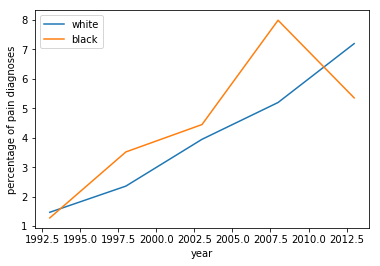

In [12]:
'''
1 = White          
2 = Black
these are the only races consistant across years
'''
year_data_white= []
year_data_black= []
year_data_other= []
lenw,lenb,lens=[],[],[]
for year in range(1993, 2017, 5):
    col = 'RACE'
    tmp_total = opiates.loc[(opiates['YEAR'] == year) | (opiates['YEAR'] == year+1) | (opiates['YEAR'] == year+2) | (opiates['YEAR'] == year+3) | (opiates['YEAR'] == year+4)]
    tmp_total = tmp_total[tmp_total[col].notnull()]
    tot_wts = np.sum(tmp_total.PATWT)
    tot_white = tmp_total[tmp_total[col] == 1]
    white_wts = np.sum(tot_white.PATWT)
    tot_black = tmp_total[tmp_total[col] == 2]
    black_wts = np.sum(tot_black.PATWT)
    tot_other = tmp_total[(tmp_total[col] != 1) & (tmp_total[col] != 2)]
    oth_wts = np.sum(tot_other.PATWT)
    
    tmp_opiates = pain_opiates.loc[(pain_opiates['YEAR'] == year) | (pain_opiates['YEAR'] == year+1) | (pain_opiates['YEAR'] == year+2) | (pain_opiates['YEAR'] == year+3) | (pain_opiates['YEAR'] == year+4)]
    tmp_opiates = tmp_opiates[tmp_opiates[col].notnull()]
    op_white = tmp_opiates[tmp_opiates[col] == 1]
    op_white_wts = np.sum(op_white.PATWT)
    op_black = tmp_opiates[tmp_opiates[col] == 2]
    op_black_wts = np.sum(op_black.PATWT)
    op_other = tmp_opiates[(tmp_opiates[col] != 1) & (tmp_opiates[col] != 2)]
    op_other_wts = np.sum(op_other.PATWT)
    
    lenw.append(len(op_white.PATWT))
    lenb.append(len(op_black.PATWT))
    lens.append(len(op_other.PATWT))
    
    year_data_white.append(op_white_wts/white_wts*100)
    year_data_black.append(op_black_wts/black_wts*100)
    year_data_other.append(op_other_wts/oth_wts*100)

years = np.arange(1993, 2017,5)
print(lenw,lenb,lens)
plt.plot(years, year_data_white, label="white")
plt.plot(years, year_data_black, label="black")

plt.xlabel("year")
plt.ylabel("percentage of pain diagnoses")
plt.legend()
plt.show()
#This plot is showing what percentage of pain patients were prescribed opiates, with regression
#opiates/pain opiates, by race, by 5-year increments

[7, 12, 6, 17, 20, 27, 31, 41, 60, 107, 126, 27] [3, 11, 9, 10, 9, 17, 31, 20, 32, 79, 91, 19]


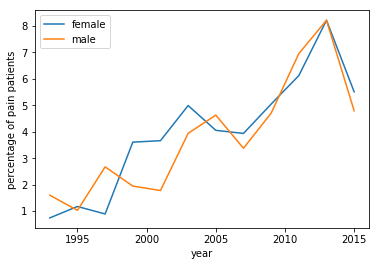

In [13]:
'''
1 = Female          
2 = Male
these are the only races consistant across years
'''
year_data_f= []
year_data_m= []
lenf,lenm=[],[]
for year in range(1993, 2017,2):
    col = 'SEX'
    tmp_total = opiates.loc[(opiates['YEAR'] == year) | (opiates['YEAR'] == year+1)]
    tmp_total = tmp_total[tmp_total[col].notnull()]
    tot_wts = np.sum(tmp_total.PATWT)
    tot_f = tmp_total[tmp_total[col] == 1]
    f_wts = np.sum(tot_f.PATWT)
    tot_m = tmp_total[tmp_total[col] == 2]
    m_wts = np.sum(tot_m.PATWT)
    
    tmp_opiates = pain_opiates.loc[(pain_opiates['YEAR'] == year) | (pain_opiates['YEAR'] == year+1)]
    tmp_opiates = tmp_opiates[tmp_opiates[col].notnull()]
    op_f = tmp_opiates[tmp_opiates[col] == 1]
    op_f_wts = np.sum(op_f.PATWT)
    op_m = tmp_opiates[tmp_opiates[col] == 2]
    op_m_wts = np.sum(op_m.PATWT)
    
    lenf.append(len(op_f.PATWT))
    lenm.append(len(op_m.PATWT))
    
    year_data_f.append(op_f_wts/f_wts*100)
    year_data_m.append(op_m_wts/m_wts*100)

years = np.arange(1993, 2017,2)
print(lenf,lenm)
plt.plot(years, year_data_f, label="female")
plt.plot(years, year_data_m, label="male")

plt.xlabel("year")
plt.ylabel("percentage of pain patients")
plt.legend()
plt.show()
#This plot is showing what percentage of pain patients were prescribed opiates, with regression
#opiates/pain opiates, by gender, by 2-year increments

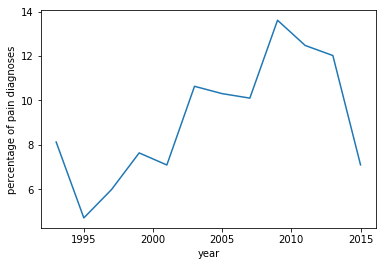

In [20]:
year_data_tot= []
year_data_chron= []
lens=[]
chron = df[df.other_joint == 1]
for year in range(1993, 2017,2):
    col = 'RACE'
    
    tmp_opiates = chron.loc[(chron['YEAR'] == year) | (chron['YEAR'] == year+1)]
    tmp_opiates = tmp_opiates[tmp_opiates[col].notnull()]
    op_wts = np.sum(tmp_opiates.PATWT)
    
    tmp_chron_opiates = pain_opiates.loc[(pain_opiates['YEAR'] == year) | (chronic_opiates['YEAR'] == year+1)]
    tmp_chron_opiates = tmp_chron_opiates[tmp_chron_opiates[col].notnull()]
    ch_op_wts = np.sum(tmp_chron_opiates.PATWT)
    
    year_data_chron.append(ch_op_wts/op_wts*100)

years = np.arange(1993, 2017,2)
plt.plot(years, year_data_chron, label="chronic")

plt.xlabel("year")
plt.ylabel("percentage of pain diagnoses")
plt.show()

#this plot shows opiate-receiving pain patients out of all pain patients (% of pain patients prescribed opiates)
# (pain opiates / pain)

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


[6, 4, 10, 13, 12, 3, 10, 17, 13, 16, 21, 23, 28, 34, 18, 43, 41, 51, 52, 134, 113, 104, 46, 0]


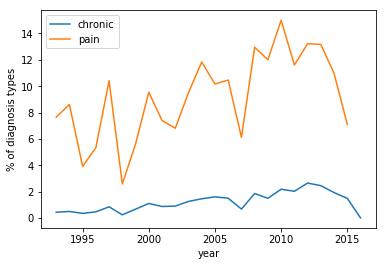

In [15]:
chron1 = df[df.chronic == 1]

year_data_tot= []
year_data_chron= []
year_data_pain=[]
lens=[]
for year in range(1993, 2017):
    col = 'RACE'
    
    tmp_opiates = chron.loc[(chron['YEAR'] == year)]
    tmp_opiates = tmp_opiates[tmp_opiates[col].notnull()]
    op_wts = np.sum(tmp_opiates.PATWT)
    
    tmp_opiates = chron1.loc[(chron1['YEAR'] == year)]
    tmp_opiates = tmp_opiates[tmp_opiates[col].notnull()]
    op1_wts = np.sum(tmp_opiates.PATWT)
    
    tmp_chron_opiates = chronic_opiates.loc[(chronic_opiates['YEAR'] == year)]
    tmp_chron_opiates = tmp_chron_opiates[tmp_chron_opiates[col].notnull()]
    ch_op_wts = np.sum(tmp_chron_opiates.PATWT)
    
    tmp_pain_opiates = pain_opiates.loc[(pain_opiates['YEAR'] == year)]
    tmp_pain_opiates = tmp_pain_opiates[tmp_pain_opiates[col].notnull()]
    pa_op_wts = np.sum(tmp_pain_opiates.PATWT)
    
    lens.append(len(tmp_chron_opiates.PATWT))
    
    year_data_chron.append(ch_op_wts/op1_wts*100)
    year_data_pain.append(pa_op_wts/op_wts*100)

years = np.arange(1993, 2017)
print(lens)
plt.plot(years, year_data_chron, label="chronic")
plt.plot(years, year_data_pain, label="pain")

plt.xlabel("year")
plt.ylabel("% of diagnosis types")
plt.legend()
plt.show()

#this plot shows opiate-receiving pain patients out of all pain patients (% of pain patients prescribed opiates)
# (chronic opiates / chronic, and pain opiates/pain)

[40, 50, 104, 255, 230] [4, 7, 15, 45, 24] [1, 2, 5, 21, 9]


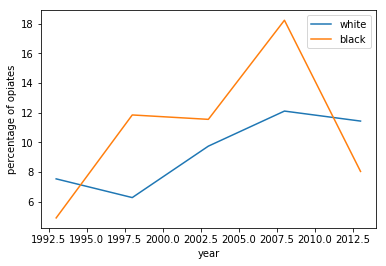

In [16]:
'''
1 = White          
2 = Black
these are the only races consistant across years
'''
year_data_white= []
year_data_black= []
year_data_other= []
lenw,lenb,lens=[],[],[]
for year in range(1993, 2017,5):
    col = 'RACE'
    tmp_total = chron.loc[chron['YEAR'].between(year, year+4)]
    tmp_total = tmp_total[tmp_total[col].notnull()]
    tot_wts = np.sum(tmp_total.PATWT)
    tot_white = tmp_total[tmp_total[col] == 1]
    white_wts = np.sum(tot_white.PATWT)
    tot_black = tmp_total[tmp_total[col] == 2]
    black_wts = np.sum(tot_black.PATWT)
    tot_other = tmp_total[(tmp_total[col] != 1) & (tmp_total[col] != 2)]
    oth_wts = np.sum(tot_other.PATWT)
    
    tmp_opiates = pain_opiates.loc[pain_opiates['YEAR'].between(year, year+4)]
    tmp_opiates = tmp_opiates[tmp_opiates[col].notnull()]
    op_white = tmp_opiates[tmp_opiates[col] == 1]
    op_white_wts = np.sum(op_white.PATWT)
    op_black = tmp_opiates[tmp_opiates[col] == 2]
    op_black_wts = np.sum(op_black.PATWT)
    op_other = tmp_opiates[(tmp_opiates[col] != 1) & (tmp_opiates[col] != 2)]
    op_other_wts = np.sum(op_other.PATWT)
    
    lenw.append(len(op_white.PATWT))
    lenb.append(len(op_black.PATWT))
    lens.append(len(op_other.PATWT))
    
    year_data_white.append(op_white_wts/white_wts*100)
    year_data_black.append(op_black_wts/black_wts*100)

years = np.arange(1993, 2017,5)
print(lenw,lenb,lens)
plt.plot(years, year_data_white, label="white")
plt.plot(years, year_data_black, label="black")

plt.xlabel("year")
plt.ylabel("percentage of opiates")
plt.legend()
plt.show()
#this plot shows opiate-receiving pain patients out of all pain patients (% of pain patients prescribed opiates)
# (pain opiates / pain), by race

[7, 12, 6, 17, 20, 27, 31, 41, 60, 107, 126, 27] [3, 11, 9, 10, 9, 17, 31, 20, 32, 79, 91, 19]


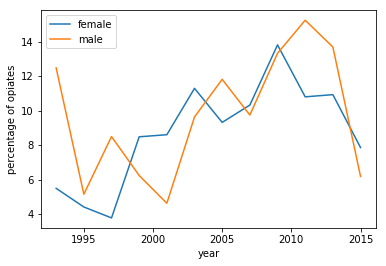

In [17]:
'''
1 = Female          
2 = Male
these are the only races consistant across years
'''
year_data_f= []
year_data_m= []
lenf,lenm=[],[]
for year in range(1993, 2017,2):
    col = 'SEX'
    tmp_total = chron.loc[(chron['YEAR'] == year) | (chron['YEAR'] == year+1)]
    tmp_total = tmp_total[tmp_total[col].notnull()]
    tot_wts = np.sum(tmp_total.PATWT)
    tot_f = tmp_total[tmp_total[col] == 1]
    f_wts = np.sum(tot_f.PATWT)
    tot_m = tmp_total[tmp_total[col] == 2]
    m_wts = np.sum(tot_m.PATWT)
    
    tmp_opiates = pain_opiates.loc[(pain_opiates['YEAR'] == year) | (pain_opiates['YEAR'] == year+1)]
    tmp_opiates = tmp_opiates[tmp_opiates[col].notnull()]
    op_f = tmp_opiates[tmp_opiates[col] == 1]
    op_f_wts = np.sum(op_f.PATWT)
    op_m = tmp_opiates[tmp_opiates[col] == 2]
    op_m_wts = np.sum(op_m.PATWT)
    
    lenf.append(len(op_f.PATWT))
    lenm.append(len(op_m.PATWT))
    
    year_data_f.append(op_f_wts/f_wts*100)
    year_data_m.append(op_m_wts/m_wts*100)

years = np.arange(1993, 2017,2)
print(lenf,lenm)
plt.plot(years, year_data_f, label="female")
plt.plot(years, year_data_m, label="male")

plt.xlabel("year")
plt.ylabel("percentage of opiates")
plt.legend()
plt.show()
#this plot shows opiate-receiving pain patients out of all pain patients (% of pain patients prescribed opiates)
# (pain opiates / pain), by gender

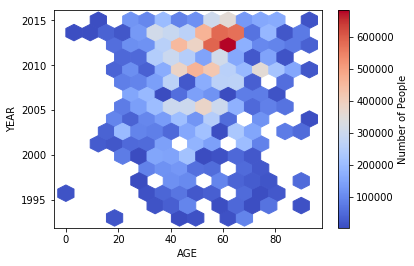

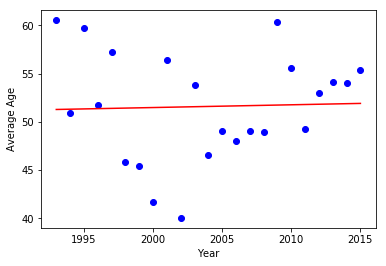

In [18]:
pain_opiates.plot(kind="Hexbin", x="AGE", y="YEAR",C='PATWT',reduce_C_function=np.sum, cmap='coolwarm', gridsize=15,sharex=False)#title='Distribution of Chronic patients Receiving Opiates',

#Labeling Colorbar
label = plt.gcf()
cax = label.get_axes()[1]
cax.set_ylabel('Number of People')
plt.show()


average_age = pain_opiates.groupby("YEAR")
holder = []
yrs = []
for k, yr in average_age:
    yrs.append(k)
    holder.append(sum(yr['AGE'].values*yr['PATWT'].values)/ sum(yr['PATWT'].values))
   
yrs = np.array(yrs)
slope, intercept, r_value, p_value, stdrr = LR(yrs, holder)
plt.scatter(yrs, holder, color='b', label="Data")
plt.plot(yrs, yrs*slope+intercept, color='r', label="Linear Regression")
plt.xlabel("Year")
plt.ylabel("Average Age")
plt.show()